# Exercise 1

**(1)** Forecasting with linear modelsÇ
> **(a)** Estimate four linear models unsing the OLS estimator

> **(b)** Forecast n steps ahead using the estimated models

> **(c)** Forecast n steps ahead (recursively) using the estimated models

> **(d)** Compute confidence intervals for both **(b)** and **(c)** forecasts

In [11]:
library(data.table)
library(readr)
library(here)

**(a)** Estimate four linear models unsing the OLS estimator

In [4]:
df = readr::read_csv(here("data", "ex2_regress_gdp.csv"))
head(df)

Warning message:
"package 'here' was built under R version 3.6.3"here() starts at C:/Users/Daniel/Desktop/Daniel/codes/python/FGV_Forecasing
Parsed with column specification:
cols(
  date = col_character(),
  ea_esi = col_double(),
  ea_gdp = col_double(),
  ea_ip = col_double(),
  ea_prodpr = col_double(),
  eurostoxx = col_double(),
  ipr = col_double(),
  pr = col_double(),
  sr = col_double(),
  su = col_double(),
  y = col_double()
)


date,ea_esi,ea_gdp,ea_ip,ea_prodpr,eurostoxx,ipr,pr,sr,su,y
1/1/1996,94.56667,1493012,86.55,77.13,49.3,-0.4265874,0.40000000,8.241198,-4.007445,-0.01904023
4/1/1996,93.20000,1504560,86.36,77.15,51.8,-0.2197676,0.13333333,4.946607,-1.455733,0.77048056
7/1/1996,94.33333,1512778,86.65,77.09,50.9,0.3352411,0.06666667,-1.752723,1.208689,0.54469339
10/1/1996,97.70000,1517439,86.98,77.40,54.6,0.3801191,0.13333333,7.017096,3.506695,0.30761525
1/1/1997,100.36667,1522744,87.99,77.62,62.7,1.1544964,0.23333333,13.832756,2.692859,0.34899919
4/1/1997,103.36667,1541912,89.67,77.86,67.9,1.8913093,0.06666667,7.967459,2.945239,1.25097564


Warning message in plot.xy(xy, type, ...):
"plot type 'line' will be truncated to first character"Warning message in plot.xy(xy, type, ...):
"plot type 'line' will be truncated to first character"Warning message in plot.xy(xy, type, ...):
"plot type 'line' will be truncated to first character"Warning message in plot.xy(xy, type, ...):
"plot type 'line' will be truncated to first character"

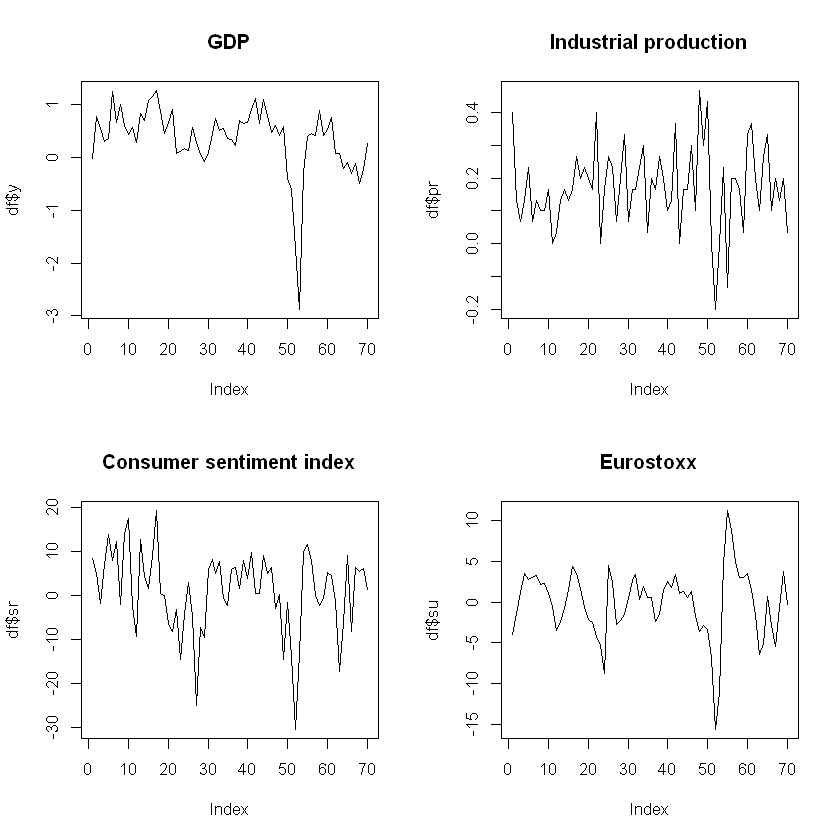

In [18]:
par(mfrow=c(2, 2))
plot(df$y, type = 'line', main = 'GDP')
plot(df$pr, type = 'line', main = 'Industrial production')
plot(df$sr, type = 'line', main = 'Consumer sentiment index')
plot(df$su, type = 'line', main = 'Eurostoxx')

In [6]:
gdp.fit <- list()
gdp.formula <- c('y ~ ipr + su + pr + sr', 'y ~ ipr + su + sr',
                 'y ~ ipr + su', 'y ~ ipr + pr + sr')

for (model in 1:4) {
  gdp.fit[[model]] <- lm(gdp.formula[model], data = df)
}

In [7]:
summary(gdp.fit[[1]])


Call:
lm(formula = gdp.formula[model], data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.6563 -0.1794 -0.0095  0.1790  0.7316 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.331230   0.060349   5.489 7.17e-07 ***
ipr          0.335927   0.028915  11.618  < 2e-16 ***
su          -0.033780   0.015088  -2.239   0.0286 *  
pr          -0.387506   0.304558  -1.272   0.2078    
sr           0.011503   0.005275   2.181   0.0328 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2892 on 65 degrees of freedom
Multiple R-squared:  0.8008,	Adjusted R-squared:  0.7886 
F-statistic: 65.34 on 4 and 65 DF,  p-value: < 2.2e-16


In [36]:
est_df = df[1:44,] # estimation window
fore_df = df[45:70,] # forecast window

gdp.est <- list()
for (model in 1:4) {
  gdp.est[[model]] <- lm(gdp.formula[model], data = est_df)
  summary(gdp.est[[model]])
}

items **(b)** e **(c)**

In [9]:
gdp.fore = list()
gdp.rec = list()

for (model in 1:4) {
  gdp.fore[[model]] = predict(gdp.est[[model]], newdata = fore_df)
  
  gdp.rec[[model]] = rep(0, 26)
  for (i in 1:26) {
    ols.rec = lm(gdp.formula[model], data = df[1:(43 + i),])
    gdp.rec[[model]][i] = predict(ols.rec, newdata = df[44 + i,])
  }
}

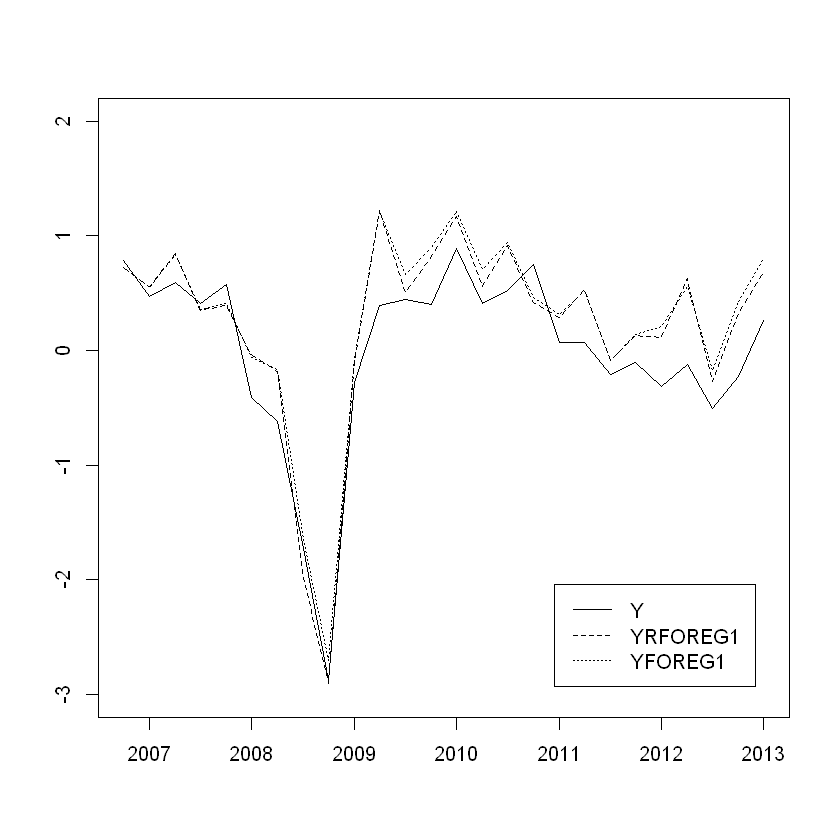

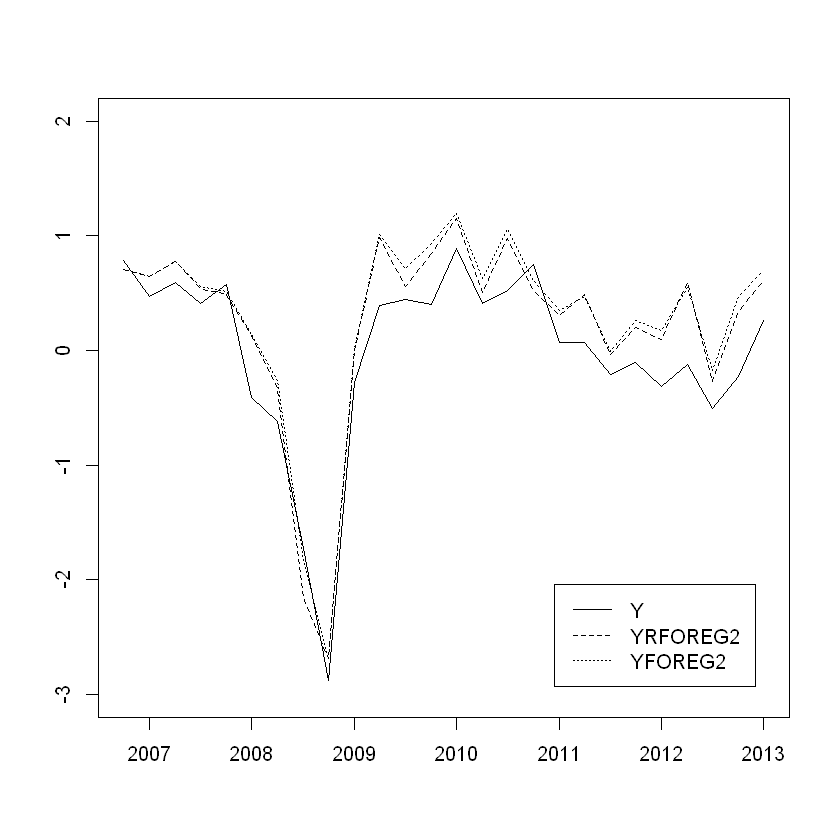

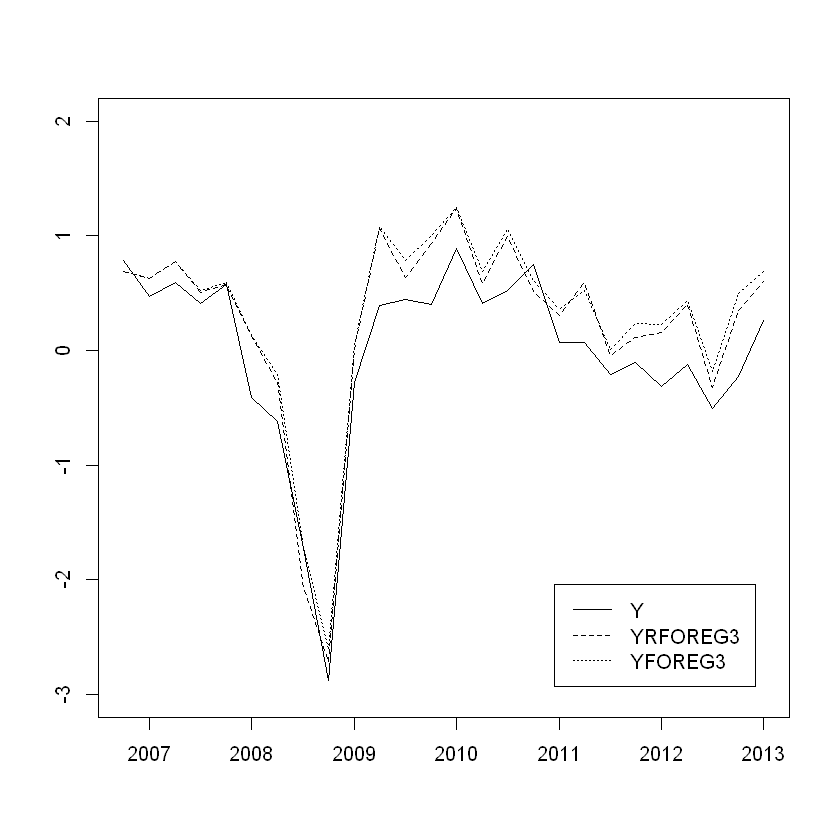

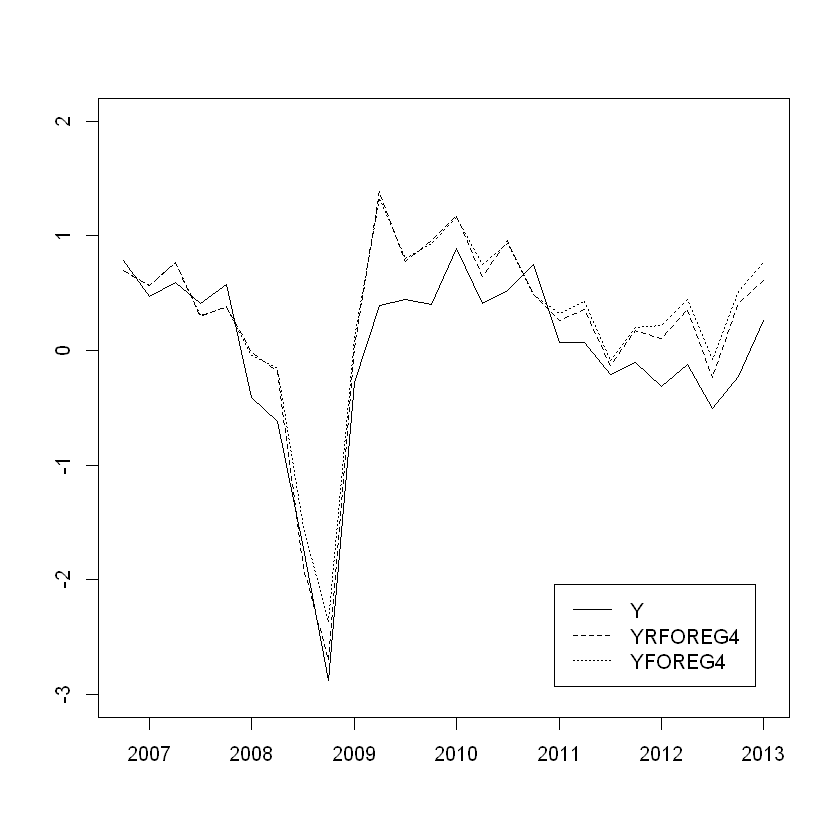

In [12]:
plot.label <- 2007:2013
par(mfrow=c(2, 2))
for (model in 1:4) {
  gdp.plot = cbind(data.table(fore_df[, 11]),
                    data.table(gdp.rec[[model]]),
                    data.table(gdp.fore[[model]]))
  setnames(gdp.plot, c('Y', paste0('YRFOREG', model),
                       paste0('YFOREG', model)))
  
  plot(gdp.plot[[1]], type = 'n', xlab = '', ylab = '',
       xaxt = 'n', ylim = c(-3, 2))
  axis(1, at = c(0:6) * 4 + 2, labels = plot.label)
  for (l in 1:3) {
    lines(gdp.plot[[l]], lty = l)
  }
  legend('bottomright', legend = colnames(gdp.plot), inset = 0.05, lty = 1:3)
}

In [42]:
gdp.fore.ic.se = list()
gdp.fore.ic.up = list()
gdp.fore.ic.low = list()
for (i in 1:length(gdp.est)){
    gdp.fore.ic.se[[i]] = sqrt(sum(gdp.est[[1]]$residuals^2) / dim(fore_df)[1])
    gdp.fore.ic.up[[i]] = gdp.fore[[i]] + 1.96 * gdp.fore.ic$se
    gdp.fore.ic.low[[i]] = gdp.fore[[i]] - 1.96 * gdp.fore.ic$se
}

In [54]:
par(mfrow(2,2))

for (i in 1:length(gdp.est)){
    dat = cbind(gdp.fore.ic.up[[i]], gdp.fore.ic.low[[i]], gdp.fore[[i]], fore_df$y)
    colnames(dat) = names = c('up', 'lower', 'predict', 'real')    
    
    matplot(dat, type = c("b"),pch=1,col = 1:4)
    legend("topleft", legend=names, col=1:4, pch=1)
}


ERROR: Error in mfrow(2, 2): could not find function "mfrow"
